<a href="https://colab.research.google.com/github/utkarsh-k-exp/Forecasting--Principles-and-Practice/blob/master/Chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Helper Functions

In [57]:
def plot_time_series(ts, xlabel = None, ylabel = None, title = None):
  """
  Function to plot a single time series

  Arguments:
  ts -- a pandas data frame, a time series data

  Returns:
  ts_figure -- an object for time series plot
  """
  fig, ax = plt.subplots()

  plt.style.use("seaborn")

  fig.set_figheight(5)
  fig.set_figwidth(20)

  ax.plot(ts)
  ax.set_xlabel(xlabel, fontsize = 15)
  ax.set_ylabel(ylabel, fontsize = 15)
  ax.set_title(title, fontsize = 15)
  ax.grid(linestyle = "--", color = 'black')

  plt.tight_layout()

  return fig, ax

def box_cox_transformation(ts, lambd):
  """
  Function to implement box cox tranformation on the original scale
  
  Arguments:
  ts -- a pandas time series, a time series data
  lambd -- a parameter for box cox tranformation

  Returns:
  ts_transformed -- a pandas data frame, box cox transformed time series
  """

  if lambd == 0:
    return np.log(ts)
  else:
    return (ts**lambd - 1)/lambd

def s_naive_forecast(ts, seasonal_period):
  """
  Function to implement the seasonal naive forecast.

  Arguments:
  ts -- a pandas data frame, a time series data
  seasonal_period -- seasonal period in which the pattern repeats itself. monthly = 12, quarterly = 4, daily = 365 etc.

  Returns:
  model_fit -- a seasonal naive model fit on the data
  """
  model = sm.tsa.statespace.SARIMAX(ts, order = (0, 0, 0), seasonal_order=(0, 1, 0, seasonal_period - 1))
  model_fit = model.fit()

  return model_fit

def naive_forecast(ts):
  """
  Function to implement the naive forecast.

  Arguments:
  ts -- a pandas data frame, a time series data

  Returns:
  model_fit -- a naive model fit on the time series data
  """
  model = sm.tsa.statespace.SARIMAX(ts, order=(0, 0, 0), seasonal_order=(0, 1, 0, 0))
  model_fit = model.fit()

  return model_fit

# Question: 1

For the following series, find an appropriate Box-Cox transformation in order to stabilise the variance.

*   usnetelec
*   usgdp
* mcopper
* enplanements

**1.1 usnetelec**

In [47]:
# usmelec: Electricity monthly total net generation. January 1973 - June 2013

ts_usmelec = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usmelec.csv", index_col="time")
ts_usmelec.drop("Unnamed: 0", axis = 1, inplace = True)

Plotting the data on the original scale

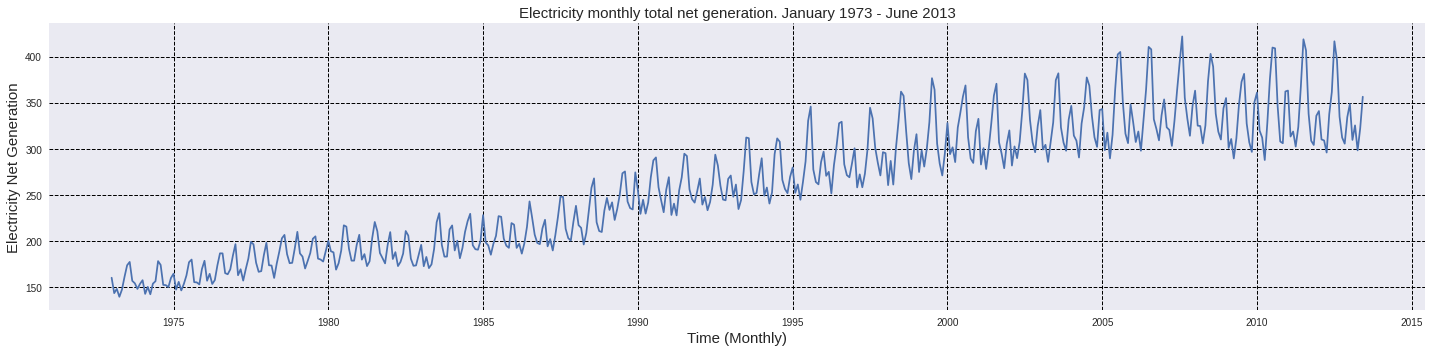

In [52]:
ts_usmelec_fig = plot_time_series(ts_usmelec, xlabel = "Time (Monthly)", ylabel = "Electricity Net Generation", title = "Electricity monthly total net generation. January 1973 - June 2013")

Variance of the data is increasing over time. Let's see the impact of box cox tranformation on the variance

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3573834748>)

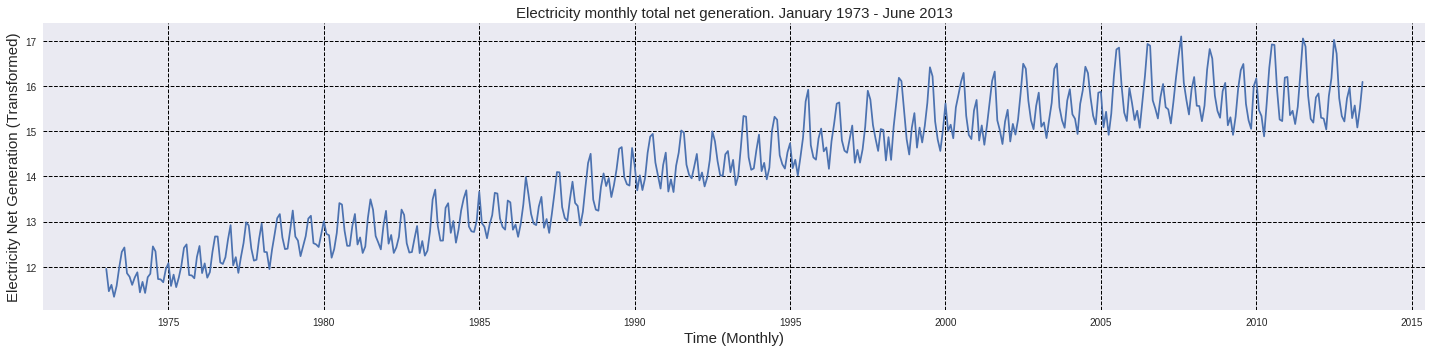

In [67]:
ts_usmelec_transformed = box_cox_transformation(ts_usmelec, lambd = 0.3)

# plotting the transformed series
plot_time_series(ts_usmelec_transformed, xlabel = "Time (Monthly)", ylabel = "Electricity Net Generation (Transformed)", title = "Electricity monthly total net generation. January 1973 - June 2013")

**A value of lambda between 0.3 and 0.5 leads to a tranformation with almost same variance throughout**

**1.2 usgdp**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35737aad30>)

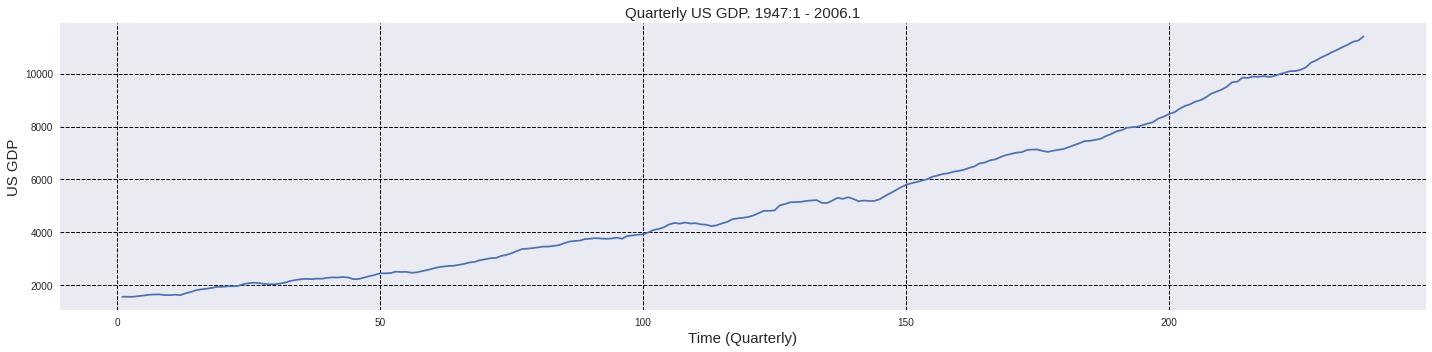

In [72]:
# let's explore the usgdp data

ts_usgdp = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usgdp.csv", index_col="Unnamed: 0")

# plotting the original data

plot_time_series(ts_usgdp, xlabel = "Time (Quarterly)", ylabel = "US GDP", title = "Quarterly US GDP. 1947:1 - 2006.1")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3573707940>)

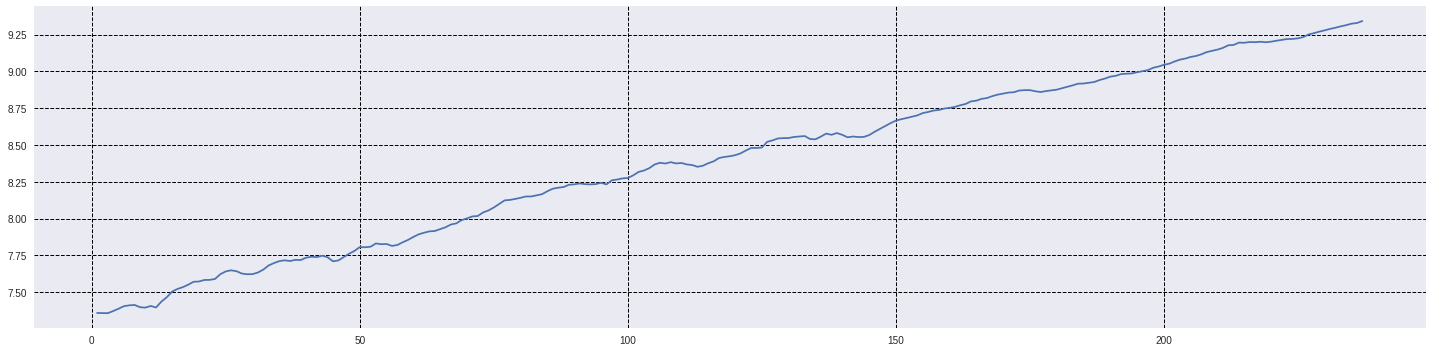

In [78]:
ts_usgdp_transformed = box_cox_transformation(ts_usgdp, lambd = 0)  # applying box cox tranformation on the original scale

# plotting the tranformed time series
plot_time_series(ts_usgdp_transformed)

**Taking a log tranformation or power tranformation does a decent job of stablizing the variance**

**1.3 mcopper**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35736eb898>)

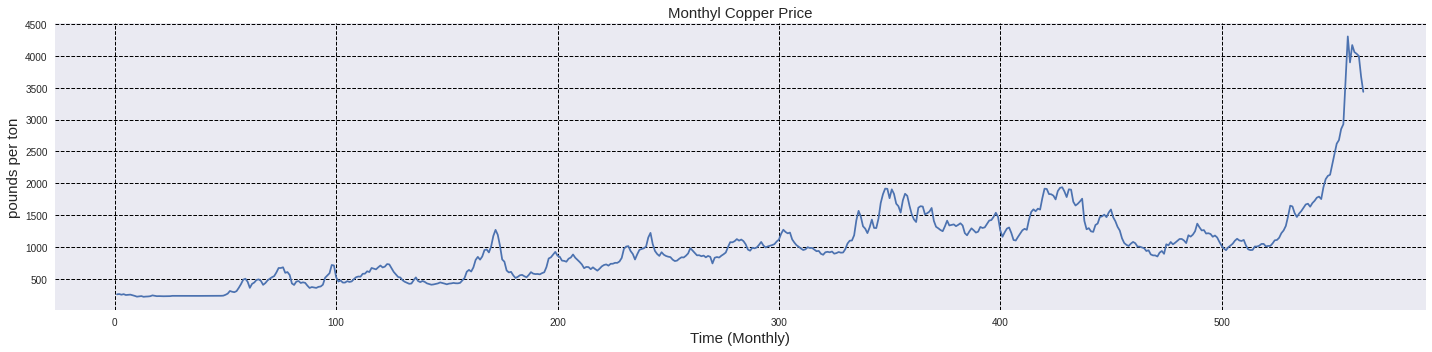

In [80]:
# Exploring the mcopper data

ts_mcopper = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/mcopper.csv", index_col="Unnamed: 0")

# plotting the original data
plot_time_series(ts_mcopper, xlabel = "Time (Monthly)", ylabel = "pounds per ton", title = "Monthyl Copper Price")

Data doesn't have contant variance throughout. Let's see the impact of box cox tranformation on the data.

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35734bb6d8>)

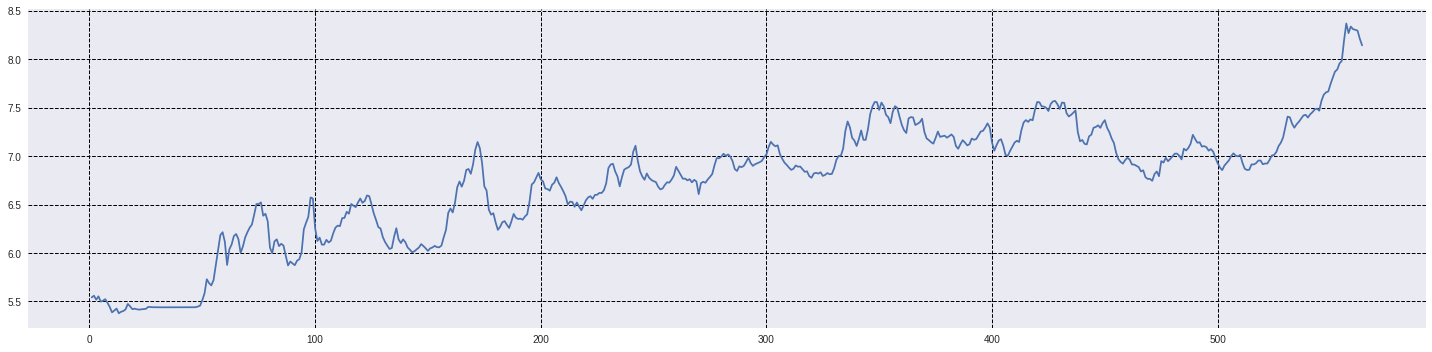

In [85]:
ts_mcopper_transformed = box_cox_transformation(ts_mcopper, lambd = 0)

# plotting the tranformed time series

plot_time_series(ts_mcopper_transformed)

**Log tranformation has done a great job in stablizing the variance throughout the data**

**1.4 enplanements**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f357343cb70>)

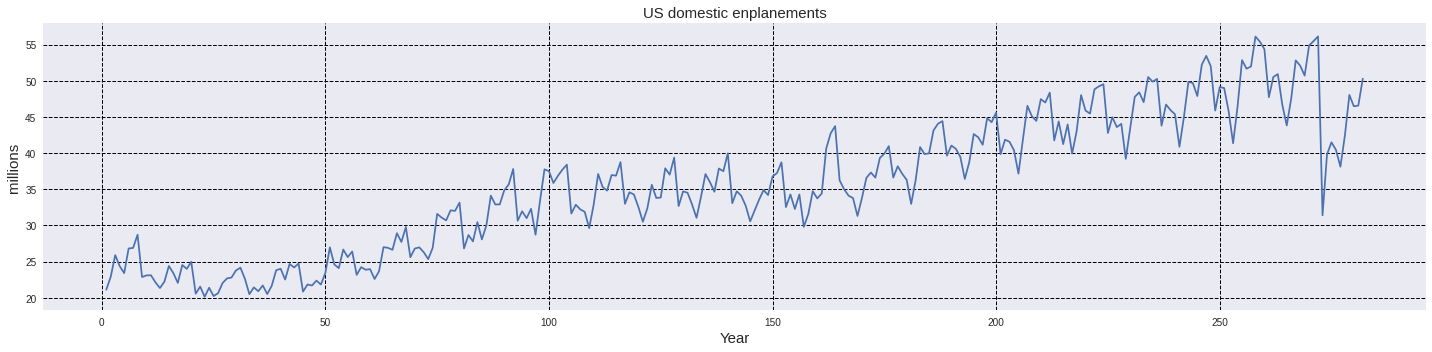

In [87]:
# Exploring the enplanements data

ts_enplanements = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/enplanements.csv", index_col = "Unnamed: 0")

# plotting the time series data
plot_time_series(ts_enplanements, xlabel="Year", title = "US domestic enplanements", ylabel="millions")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35732e89b0>)

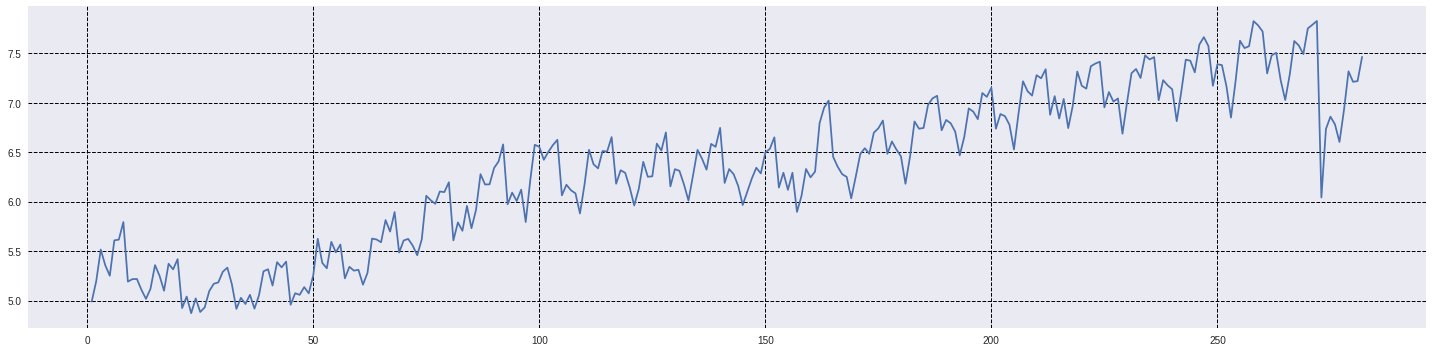

In [92]:
ts_enplanements_tranformed = box_cox_transformation(ts_enplanements, lambd = 0.3)

# plotting the tranformed data

plot_time_series(ts_enplanements_tranformed)

**Power tranformation with lambda of value between 0.3 and 0.5 would be a desent choice. Though, data seems almost unchanged after the tranformation.**

# Question: 2

Why is a Box-Cox transformation unhelpful for the cangas data?

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f357343cda0>)

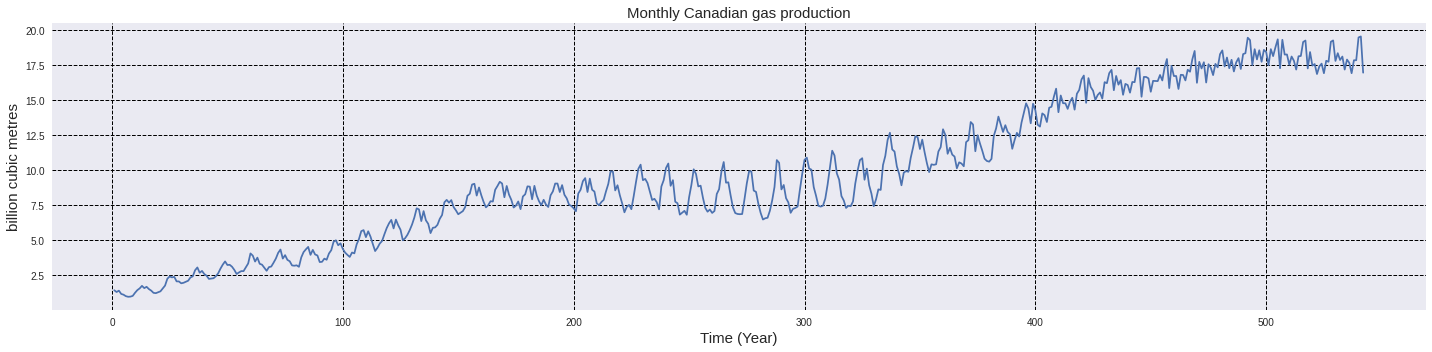

In [94]:
# importing the cangas data
ts_cangas = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/cangas.csv", index_col="Unnamed: 0")

# plotting the data
plot_time_series(ts_cangas, xlabel = "Time (Year)", ylabel = "billion cubic metres", title = "Monthly Canadian gas production")

Data doesn't have a constant variance throughout

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3572e2b160>)

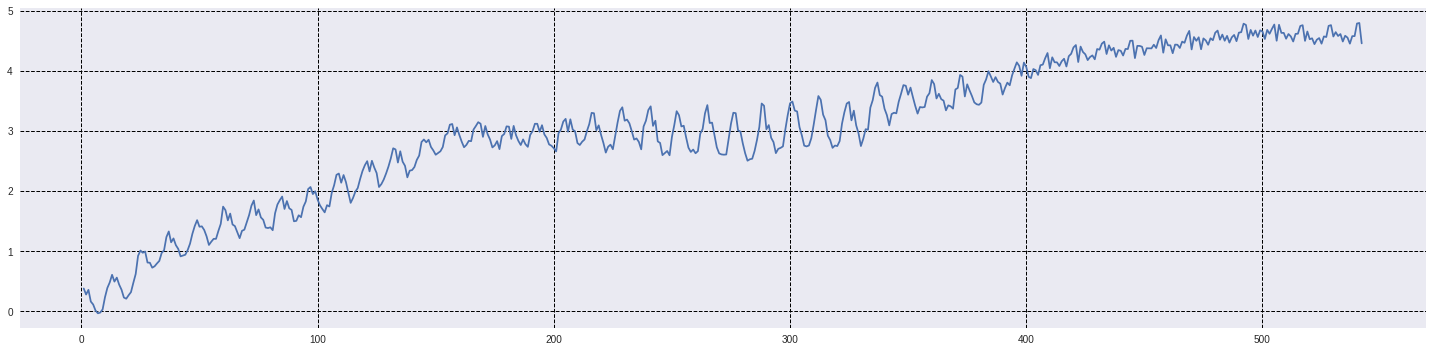

In [107]:
ts_cangas_tranformed = box_cox_transformation(ts_cangas, lambd = 0.3)  # box cox tranformation of the data

# plotting the transformed data

plot_time_series(ts_cangas_tranformed)

**Conclusion: Neither log or power tranformation is useful for cangas data as transformation is not making the variance constant throughout. Therefore, box cox tranformation is useless for this data.**

# Question: 3 

What Box-Cox transformation would you select for your retail data (from Exercise 3 in Section 2.10)?

In [114]:
ts_retail = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/retail.xlsx", skiprows=[1], index_col = "Unnamed: 0")

categories = ts_retail.columns  # names of all the columns

random_category = np.random.choice(categories)  # picking a random time series from all the categories

ts_retail = ts_retail[[random_category]]

,"Turnover ; Northern Territory ; Clothing, footwear and personal accessory retailing ;"
1982-04-01,NaN
1982-05-01,NaN
1982-06-01,NaN
1982-07-01,NaN
1982-08-01,NaN
...,...
2013-08-01,15.3
2013-09-01,12.7
2013-10-01,13.4
2013-11-01,13.3


(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3572917fd0>)

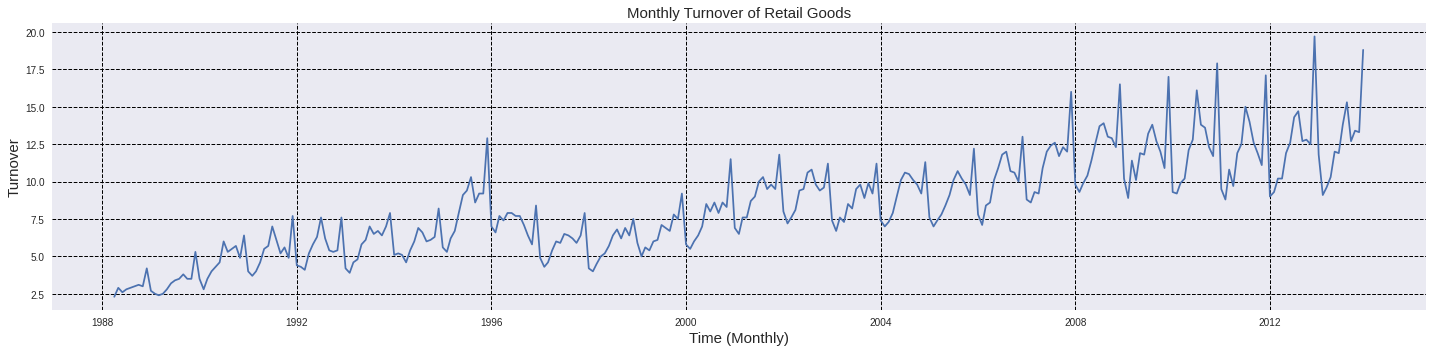

In [115]:
# plotting the time series data
plot_time_series(ts_retail, xlabel = "Time (Monthly)", ylabel = "Turnover", title = "Monthly Turnover of Retail Goods")

Data doesn't have a contant variance througout. A simpler data always leads to better prediction. Let's see if box cox tranformation can make the variance contant throughout.

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35719fea58>)

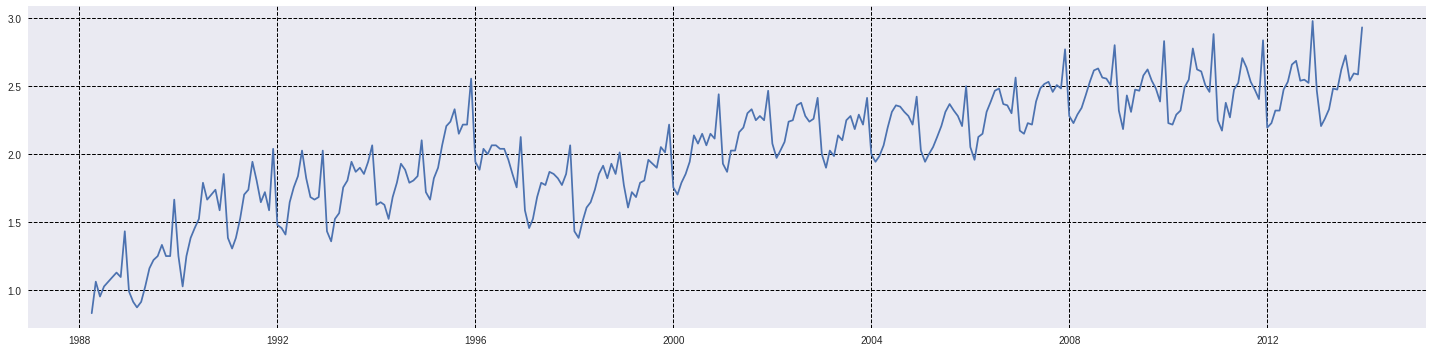

In [125]:
ts_retail_tranformed = box_cox_transformation(ts_retail, lambd = 0.0)

# plotting the tranformed data

plot_time_series(ts_retail_tranformed)

**Conclusion: Taking the log tranformation of the original data makes the variance contant throughout.**

# Question: 4

For each of the following series, make a graph of the data. If transforming seems appropriate, do so and describe the effect. dole, usdeaths, bricksq.

**4.1 dole**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35715b56d8>)

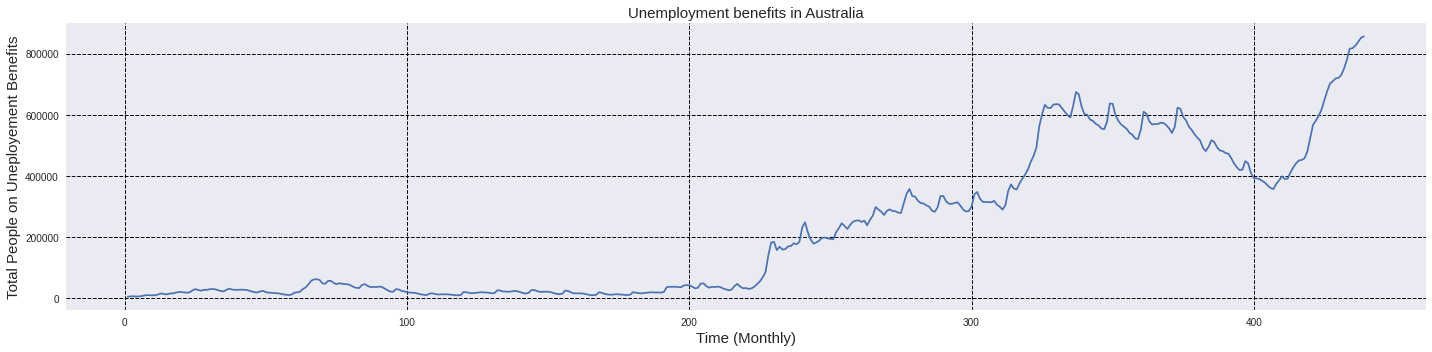

In [127]:
ts_dole = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/dole.csv", index_col="Unnamed: 0")

# plotting the time series data
plot_time_series(ts_dole, xlabel = "Time (Monthly)", ylabel = "Total People on Uneployement Benefits", title = "Unemployment benefits in Australia")

dole data doesn't have a contant variance throughout

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3571a5d0f0>)

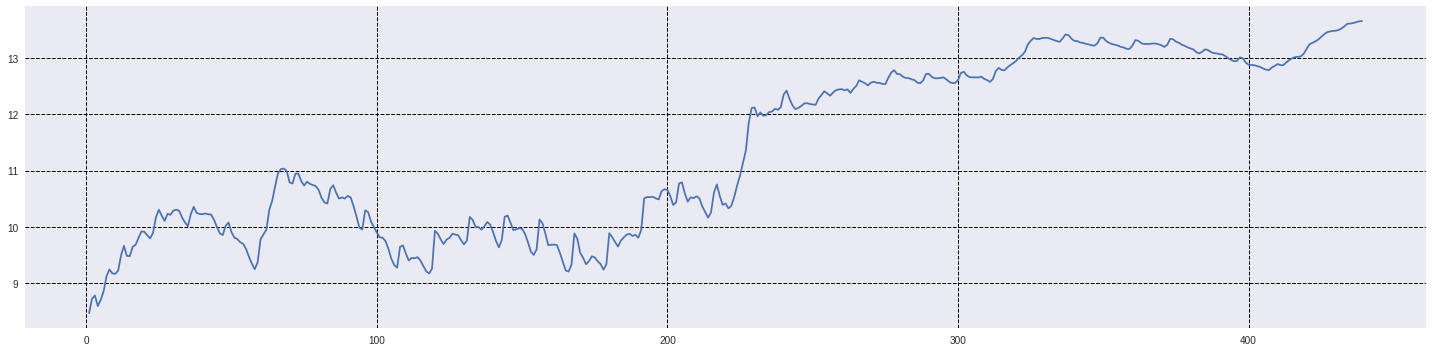

In [134]:
ts_dole_tranformed = box_cox_transformation(ts_dole, lambd = 0.0)

# plotting the tranformed data

plot_time_series(ts_dole_tranformed)

**Conclusion: Taking a log tranformation of the data makes the variance contant throughout.**

**4.2 usdeaths**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3572b57470>)

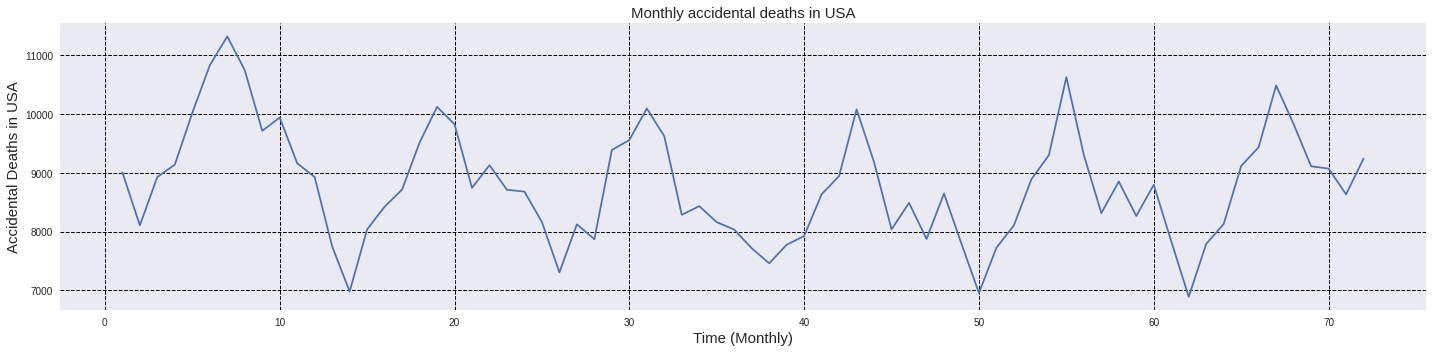

In [136]:
ts_usdeaths = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/usdeaths.csv", index_col = "Unnamed: 0")

# plotting the time series

plot_time_series(ts_usdeaths, xlabel = "Time (Monthly)", ylabel = "Accidental Deaths in USA", title = "Monthly accidental deaths in USA")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f357153e6a0>)

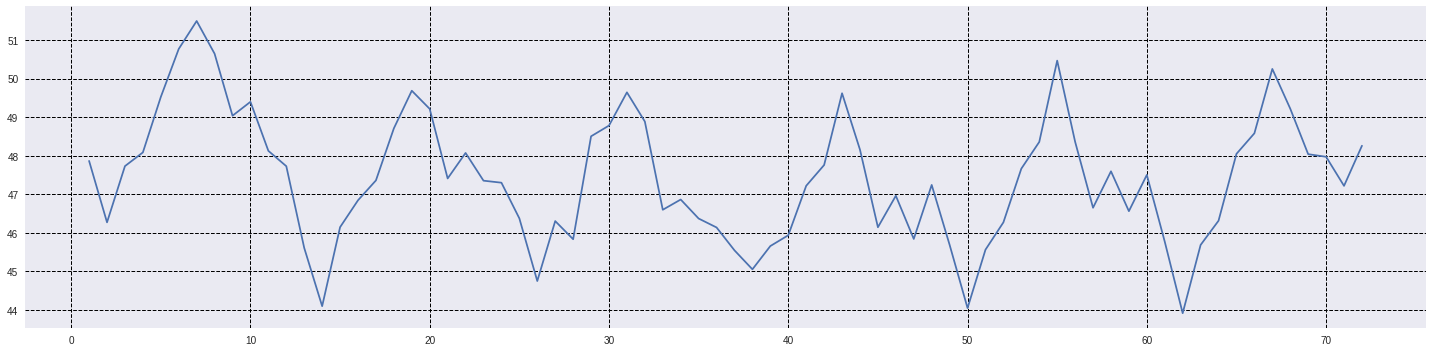

In [138]:
ts_usdeaths_transformed = box_cox_transformation(ts_usdeaths, lambd = 0.3)

# plotting the transformed time series

plot_time_series(ts_usdeaths_transformed)

**Conclusion: Data already has a contant mean throughout. Using tranformation on this data will not have any visible impact**

**4.3 bricksq**

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f35715a3dd8>)

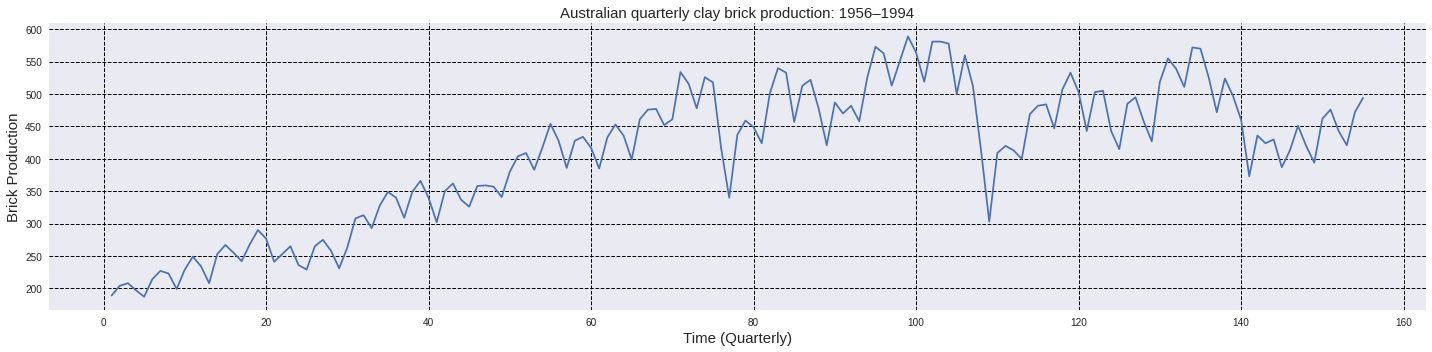

In [140]:
ts_bricksq = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Time Series Analysis/Data/bricksq.csv", index_col = "Unnamed: 0")

# plotting the data

plot_time_series(ts_bricksq, xlabel = "Time (Quarterly)", ylabel = "Brick Production", title = "Australian quarterly clay brick production: 1956–1994")

(<Figure size 1440x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f357284a630>)

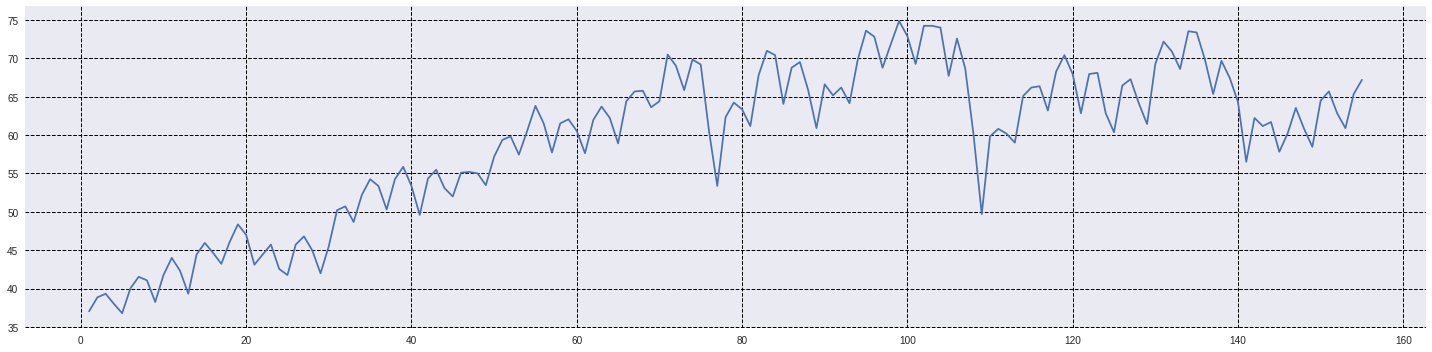

In [144]:
ts_bricksq_transformed = box_cox_transformation(ts_bricksq, lambd = 0.6)

# plotting the tranformed data

plot_time_series(ts_bricksq_transformed)

**Conclusion: Neither log or power tranformation has any effect on variance of the data**

**Final Conclusion:**



1.   If a transformation can make the variance contant throughout, use it or else don't use tranformations
2.   If using tranformation, make predictions on tranformed data and then scale it back to the original scale
3. Transformations are not always likely to use in most of the data

